In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
houses = pd.read_csv("/Users/vamseemuppavarapu/Desktop/Python-Anokha/Linear Regression/kc_house_data.csv")
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
#checking for null values this is our data cleansing step.
houses.isnull().sum() 
#output 0 indicates that there are no null values.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

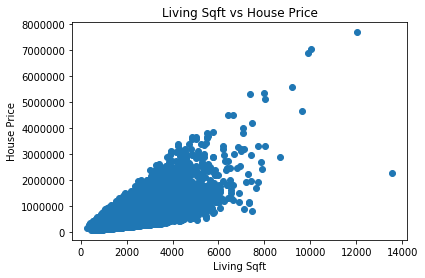

In [25]:
#creating a simple linear regression model taking just 2 parameters. Sqft of Living room and price of the house.
# so we use the Sqft of living room as parameter and depending on this the cost of the house will vary.

# create x and y
feature_cols = 'sqft_living' 
x = houses[feature_cols] # predictor
y = houses.price # response
plt.scatter(x,y)
plt.title("Living Sqft vs House Price")
plt.xlabel("Living Sqft")
plt.ylabel("House Price")
plt.show()

#creating the data frames.
df_X = pd.DataFrame(x)
df_y = pd.DataFrame(y)

In [18]:
# we need to split our data into training data and testing data. 
#We use the training data for training the model and use test data to check the efficiency of the model.

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2) 
# the test set will be 20% of the whole data set


Coefficients: 
 [[282.19160684]]
Mean squared error: 62300776592.18


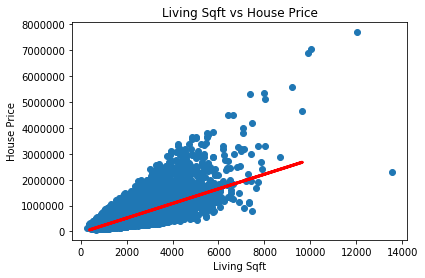

In [31]:
# now train the model with the training data
# instantiate, fit
linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_pred=linreg.predict(x_test)
print('Coefficients: \n', linreg.coef_)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

plt.scatter(x,y)
plt.title("Living Sqft vs House Price")
plt.xlabel("Living Sqft")
plt.ylabel("House Price")
plt.plot(x_test, y_pred, color='red', linewidth=3)

In [21]:
print(linreg.intercept_) # if line equation is of the form y=mx+c, this is c
print(linreg.coef_) # this is m, change in y with respect to x. (simply dy/dx)

# for an increase of 1 square meter in house size,
# the house price will go up by ~$282, on average

[-46103.65883124]
[[282.19160684]]


In [23]:
# predicting the price of house for a new input.
# calculating price of 1000 sqft living room house manually
price = -46773.6549892 + 1000*282.29917574

# using the model
linreg.predict(1000)

array([[236087.94800517]])

In [34]:
mse = mean_squared_error(y_test, linreg.predict(x_test))
np.sqrt(mse)


249601.23515755555

In [35]:
linreg.score(x_test,y_test)

0.5083390031688975